#  Assignment: CNN-Based Image Classification Using CIFAR-100
**Total Marks: 100**

**Instructions:**
- This is a programming and analysis-based assignment.
- Use TensorFlow/Keras to build your models.
- Add appropriate comments and explanations.
- Attempt all questions. Marks are indicated.


##  Section A: Data Exploration and Preprocessing (20 marks)

In [45]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

**Q1.** (5 marks) Load the CIFAR-100 dataset using `label_mode='fine'`. Print the shape of the training and test sets.

In [46]:
# Your code here

(X_train,y_train), (X_test,y_test) = datasets.cifar100.load_data(label_mode='fine')

In [47]:
X_train.shape

(50000, 32, 32, 3)

**Q2.** (5 marks) Display 10 random images from the dataset with their class labels.

In [48]:
# Your code here
for i in range(0,10):
  print(X_train[i],y_train[i])

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [195 205 193]
  [212 224 204]
  [182 194 167]]

 [[255 255 255]
  [254 254 254]
  [254 254 254]
  ...
  [170 176 150]
  [161 168 130]
  [146 154 113]]

 [[255 255 255]
  [254 254 254]
  [255 255 255]
  ...
  [189 199 169]
  [166 178 130]
  [121 133  87]]

 ...

 [[148 185  79]
  [142 182  57]
  [140 179  60]
  ...
  [ 30  17   1]
  [ 65  62  15]
  [ 76  77  20]]

 [[122 157  66]
  [120 155  58]
  [126 160  71]
  ...
  [ 22  16   3]
  [ 97 112  56]
  [141 161  87]]

 [[ 87 122  41]
  [ 88 122  39]
  [101 134  56]
  ...
  [ 34  36  10]
  [105 133  59]
  [138 173  79]]] [19]
[[[255 255 255]
  [253 253 253]
  [253 253 253]
  ...
  [253 253 253]
  [253 253 253]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]

In [49]:
y_train[0:2]

array([[19],
       [29]])

In [50]:
y_train = y_train.reshape(-1,)

In [51]:
y_train[0:10]

array([19, 29,  0, 11,  1, 86, 90, 28, 23, 31])

array([[[ 43,  49,  46],
        [ 32,  40,  34],
        [ 87,  89,  47],
        ...,
        [ 74,  84,  48],
        [ 43,  51,  30],
        [ 39,  45,  33]],

       [[ 44,  47,  51],
        [ 38,  42,  42],
        [ 59,  61,  32],
        ...,
        [ 66,  74,  47],
        [ 40,  47,  31],
        [ 40,  46,  34]],

       [[ 45,  45,  50],
        [ 43,  43,  44],
        [ 44,  47,  30],
        ...,
        [ 51,  58,  40],
        [ 40,  46,  34],
        [ 43,  49,  37]],

       ...,

       [[ 51,  50,  31],
        [ 56,  51,  33],
        [ 72,  64,  45],
        ...,
        [109,  94,  43],
        [160, 154,  90],
        [125, 120,  62]],

       [[ 80,  77,  45],
        [ 68,  62,  33],
        [ 78,  69,  42],
        ...,
        [101,  92,  54],
        [ 82,  79,  36],
        [ 75,  76,  32]],

       [[109, 102,  57],
        [ 92,  84,  47],
        [108,  99,  67],
        ...,
        [ 93,  88,  60],
        [ 55,  55,  29],
        [ 63,  67,  37]]], dtype=uint8)
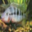

In [52]:
X_train[4]

**Q3.** (5 marks) Normalize the images and one-hot encode the labels. Explain why we perform both operations.

In [53]:
# Code:
# Your code here

X_train = X_train/255
X_test = X_test/255

**Answer:**

_Your explanation here_

**Q4.** (5 marks) What challenges do you expect when working with 100 classes instead of 10 (like CIFAR-10)?

_Your answer here_

##  Section B: Model Design & Training (40 marks)

**Q5.** (20 marks) Build and compile a CNN with at least two convolutional blocks and one dense output layer with 100 neurons. Use appropriate dropout and activation functions. Display the model summary.

In [59]:
# Your CNN model code here

cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(100, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Q6.** (15 marks) Train the model for 15–20 epochs and plot training and validation accuracy curves.

In [61]:
# Your training code here

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Q7.** (10 marks) Report the final test accuracy. Discuss what it indicates about the model's performance.

In [62]:
# Model evaluation code here

cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │       230,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,892 (976.14 KB)

 Trainable params: 249,892 (976.14 KB)

 Non-trainable params: 0 (0.00 B)

In [63]:
cnn.fit(X_train, y_train, epochs=15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 40ms/step - accuracy: 0.1199 - loss: 3.8912
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.3090 - loss: 2.8483
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.3865 - loss: 2.4665
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4439 - loss: 2.2057
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 62s 40ms/step - accuracy: 0.4921 - loss: 2.0024
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.5236 - loss: 1.8353
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.5571 - loss: 1.6866
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.5865 - loss: 1.5678
Epoch 9/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6178 - loss: 1.4411
Epoch 10/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.6396 - loss: 1.3387
Epoch 11/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6675 - loss: 1.2377
Epoch 12

In [66]:
cnn.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.3530 - loss: 3.6327


[3.5948221683502197, 0.3544999957084656]

_Your explanation here_

##  Section C: Model Experimentation (20 marks)

**Q8.** (10 marks) Add one more convolutional block to the CNN. Train and compare accuracy with your previous model. Which one performs better and why?

In [68]:
# Modified model code here

cnn1 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(100, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
cnn1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [70]:
cnn1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 82,020 (320.39 KB)

 Trainable params: 82,020 (320.39 KB)

 Non-trainable params: 0 (0.00 B)

In [71]:
cnn1.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 41ms/step - accuracy: 0.0630 - loss: 4.2005
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.2019 - loss: 3.3552
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 64s 41ms/step - accuracy: 0.2643 - loss: 3.0235
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.3041 - loss: 2.8129
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.3305 - loss: 2.6958


_Comparison answer here_

**Q9.** (10 marks) Use `label_mode='coarse'` and repeat training with the original model (2 conv blocks). Compare the accuracy. Explain why there's a difference.

In [72]:
# Your code and comparison here
(X_train,y_train), (X_test,y_test) = datasets.cifar100.load_data(label_mode='coarse')


In [73]:
cnn2 = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(100, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [74]:
cnn2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [75]:
cnn2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 100)            │       230,500 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 249,892 (976.14 KB)

 Trainable params: 249,892 (976.14 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
cnn2.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 63s 39ms/step - accuracy: 0.1443 - loss: 5.2838
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.2564 - loss: 2.4565
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.2962 - loss: 2.3127
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 39ms/step - accuracy: 0.3427 - loss: 2.1711
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.3762 - loss: 2.0577


In [78]:
cnn2.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3516 - loss: 2.1897


[2.184053897857666, 0.3544999957084656]

_Explanation here_

##  Section D: Conceptual Questions (20 marks)

**Q10.** (5 marks) Explain the role of dropout in CNNs. What could happen if we remove dropout layers?

Dropout in CNN is a regularization technique in CNN which removes neurons randomly to avoid dependancy on any single neuron. This helps to avoid overfitting. If we remove dropout layers, models can lead to overfitting.

**Q11.** (5 marks) What is the role of the softmax activation in the output layer of your CNN?


Softmax activation function is used for multiclass classification and converts raw outputs to probabilies summing to 1.

**Q12.** (5 marks) What changes would you make to the CNN architecture to improve training speed and reduce overfitting?

Regularization techniques like dropout and batch normalization can be used to reduce overfitting.